In [ ]:
def split_train_val_test(dirr, dataset="preprocessed"):
    images = os.listdir(f"{dirr}/{dataset}")
    random.shuffle(images)

    train_images = images[:int(0.8 * len(images))]
    val_images = images[int(0.8 * len(images)):int(0.9 * len(images))]
    test_images = images[int(0.9 * len(images)):]

    # create json files
    data = []
    for img in train_images:
        data.append({"file_name": img, "split": "train"})

    for img in val_images:
        data.append({"file_name": img, "split": "val"})

    for img in test_images:
        data.append({"file_name": img, "split": "test"})

    with open(f"{dirr}/splits.json", 'w') as f:
        json.dump(data, f)

    print(f"Number of train images: {len(train_images)}")
    print(f"Number of val images: {len(val_images)}")
    print(f"Number of test images: {len(test_images)}")

## Signatures preprocessing

In [63]:
dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/qrs_dataset/"
dataset = "dataset3"

In [ ]:
dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/qrs_dataset/"
dataset = "dataset3"

# read all images and split them into train, val and test
import os

images = os.listdir(f"{dir2signatures}/{dataset}/forge")

import random

random.shuffle(images)

train_images = images[:int(0.8 * len(images))]
val_images = images[int(0.8 * len(images)):int(0.9 * len(images))]
test_images = images[int(0.9 * len(images)):]

# create json files
data = []
for img in train_images:
    data.append({"file_name": img, "split": "train"})
    
for img in val_images:
    data.append({"file_name": img, "split": "val"})
    
for img in test_images:
    data.append({"file_name": img, "split": "test"})
    
with open(f"{dir2qrs}ds3_splits.json", 'w') as f:
    json.dump(data, f)
    

print(f"Number of train images: {len(train_images)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

In [64]:
import json
dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
dataset = "dataset3"

with open(f"{dir2signatures}ds3_splits.json", 'r') as f:
    qrs = json.load(f)

In [ ]:
import json

json_split = '/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Datasets/QRs_dataset/splits.json'
# qrs_folder = 
with open(json_split, 'r') as f:
    qrs = json.load(f)

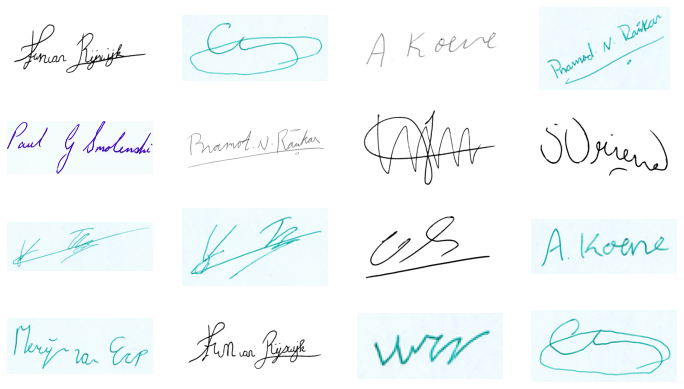

In [66]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots(4, 4, figsize=(12, 7))

for i in range(4):
    for j in range(4):
        img = plt.imread(f"{dir2signatures}/{dataset}/forge/{qrs[i*4+j]['file_name']}")
        fig[i, j].imshow(img, cmap='gray')
        fig[i, j].axis('off')
        
plt.show()

In [130]:
import cv2
import numpy as np

def preprocess_signature(image_path):
    image = cv2.imread(image_path)
    # resize the image to the largest dimension being 800px
    h, w, _ = image.shape
    if h > w:
        new_h = 1000
        new_w = int(w * new_h / h)
    else:
        new_w = 1000
        new_h = int(h * new_w / w)
        
    image = cv2.resize(image, (new_w, new_h))
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Bitwise-and and color background white
    kernel = np.ones((3, 3), np.uint8)
    # gray2 = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=2)
    gray2 = cv2.erode(gray, kernel, iterations=1)
     
    # blur = cv2.GaussianBlur(dilated, (3,3), 0)
    thresh = cv2.threshold(gray2, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # result = image.copy()
    # result[thresh==255] = 0
    # result[thresh==0] = 255

    # add an alpha channel to the image
    result = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
    result[:, :, 3] = thresh
    
    # reshape the image to the biggest dimension being 400px
    h, w, _ = result.shape
    if h > w:
        new_h = 400
        new_w = int(w * new_h / h)
    else:
        new_w = 400
        new_h = int(h * new_w / w)
        
    result = cv2.resize(result, (new_w, new_h))

    return result, thresh


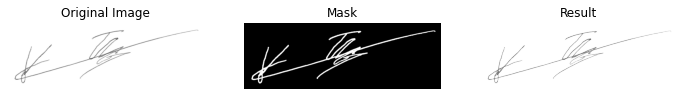

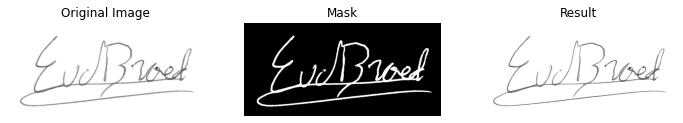

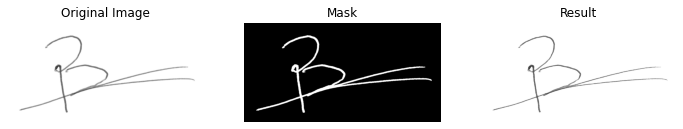

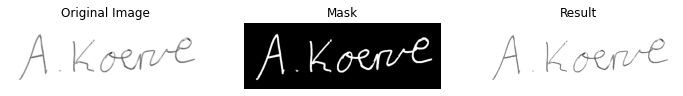

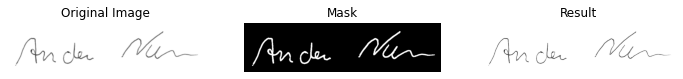

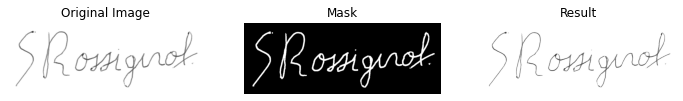

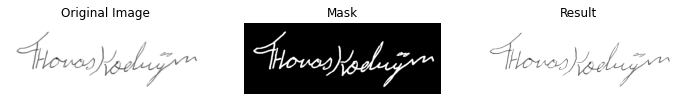

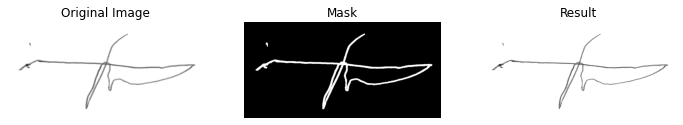

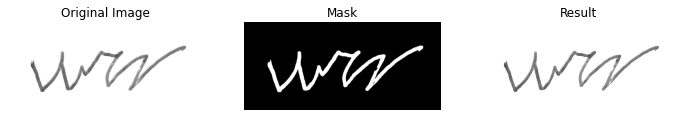

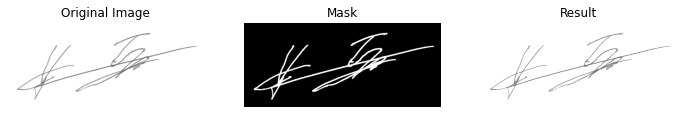

KeyboardInterrupt: 

In [131]:
import os
import cv2
import matplotlib.pyplot as plt
dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
# dir2signatures = '/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Datasets/Signatures_dataset/'
dataset = "dataset2/forge"

# Get the list of image files
image_files = os.listdir(f"{dir2signatures}/{dataset}") 

# Iterate over the image files
for image_file in image_files:
    # Get the image path
    image_path = f"{dir2signatures}/{dataset}/{image_file}"
    
    # Preprocess the image
    result, mask = preprocess_signature(image_path)
    
    # Plot the original image, mask, and result
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    # Plot the original image
    original_image = cv2.imread(image_path)
    # original_image = cv2.cvtColor(original_image, 
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Plot the mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Mask')
    axes[1].axis('off')
    
    # Plot the result
    axes[2].imshow(result, cmap='gray')
    axes[2].set_title('Result')
    axes[2].axis('off')
    
    plt.show()


In [132]:
import os

dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
dataset = "dataset5"

# Get the list of image files
image_files = os.listdir(f"{dir2signatures}/{dataset}")

# Iterate over the image files
for image_file in image_files:
    # Get the image path
    image_path = f"{dir2signatures}/{dataset}/{image_file}"
    
    # Preprocess the image
    result, mask = preprocess_signature(image_path)
    
    # Save the result
    os.makedirs(f"{dir2signatures}/preprocessed", exist_ok=True)
    print(f"Saving image: {image_file[:-4]}png")
    cv2.imwrite(f"{dir2signatures}/preprocessed/{image_file[:-4]}png", result, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

Saving image: 01F10.png
Saving image: 01F11.png
Saving image: 01F12.png
Saving image: 01F13.png
Saving image: 01F14.png
Saving image: 01F15.png
Saving image: 01F16.png
Saving image: 01F17.png
Saving image: 01F18.png
Saving image: 01F19.png
Saving image: 01F2.png
Saving image: 01F20.png
Saving image: 01F22.png
Saving image: 01F23.png
Saving image: 01F24.png
Saving image: 01F26.png
Saving image: 01F27.png
Saving image: 01F28.png
Saving image: 01F29.png
Saving image: 01F3.png
Saving image: 01F30.png
Saving image: 01F31.png
Saving image: 01F32.png
Saving image: 01F33.png
Saving image: 01F34.png
Saving image: 01F35.png
Saving image: 01F36.png
Saving image: 01F37.png
Saving image: 01F38.png
Saving image: 01F39.png
Saving image: 01F4.png
Saving image: 01F5.png
Saving image: 01F6.png
Saving image: 01F7.png
Saving image: 01F8.png
Saving image: 01F9.png
Saving image: 01T1.png
Saving image: 01T10.png
Saving image: 01T11.png
Saving image: 01T12.png
Saving image: 01T13.png
Saving image: 01T14.png
S

In [133]:
split_train_val_test(dir2signatures)

Number of train images: 2252
Number of val images: 282
Number of test images: 282


### adding it to the pages

In [22]:
def add_transparent_image(background, foreground, x_offset=None, y_offset=None):
    bg_h, bg_w, bg_channels = background.shape
    fg_h, fg_w, fg_channels = foreground.shape

    assert bg_channels == 3, f'background image should have exactly 3 channels (RGB). found:{bg_channels}'
    assert fg_channels == 4, f'foreground image should have exactly 4 channels (RGBA). found:{fg_channels}'

    # center by default
    if x_offset is None: x_offset = (bg_w - fg_w) // 2
    if y_offset is None: y_offset = (bg_h - fg_h) // 2

    w = min(fg_w, bg_w, fg_w + x_offset, bg_w - x_offset)
    h = min(fg_h, bg_h, fg_h + y_offset, bg_h - y_offset)

    if w < 1 or h < 1: return

    # clip foreground and background images to the overlapping regions
    bg_x = max(0, x_offset)
    bg_y = max(0, y_offset)
    fg_x = max(0, x_offset * -1)
    fg_y = max(0, y_offset * -1)
    foreground = foreground[fg_y:fg_y + h, fg_x:fg_x + w]
    background_subsection = background[bg_y:bg_y + h, bg_x:bg_x + w]

    # separate alpha and color channels from the foreground image
    foreground_colors = foreground[:, :, :3]
    alpha_channel = foreground[:, :, 3] / 255  # 0-255 => 0.0-1.0

    # construct an alpha_mask that matches the image shape
    alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))

    # combine the background with the overlay image weighted by alpha
    composite = background_subsection * (1 - alpha_mask) + foreground_colors * alpha_mask

    # overwrite the section of the background image that has been updated
    background[bg_y:bg_y + h, bg_x:bg_x + w] = composite

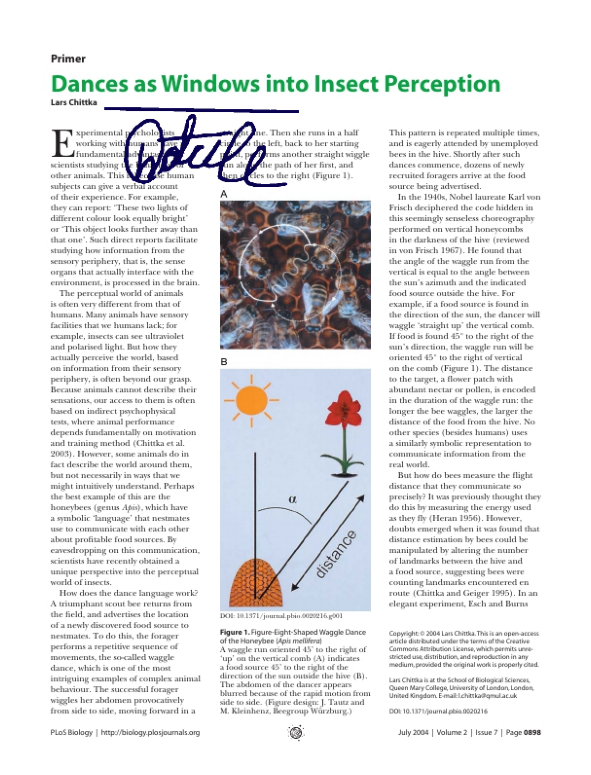

In [25]:
# page = f"{dir2publaynet}/{split}/{sample['file_name']}"
page = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github\Project_Synthesis2-\Datasets\Publaynet\train\PMC449901_00000.jpg"

background = cv2.imread(page)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

result, thresh = preprocess_signature(f"{dir2signatures}/preprocessed/01F2.png")

overlay = cv2.resize(result, (0,0), fx=0.25, fy=0.25)
thresh = cv2.resize(thresh, (0,0), fx=0.25, fy=0.25)

overlay = cv2.cvtColor(overlay, cv2.COLOR_RGB2RGBA)
overlay[:, :, 3] = thresh

# change the color of the overlay
overlay[:, :, 0] = 9
overlay[:, :, 1] = 2
overlay[:, :, 2] = 80

# generate texture for the pen
add_transparent_image(background, overlay, x_offset=100, y_offset=100)

plt.figure(figsize=(22, 14))
plt.imshow(background)
plt.axis('off')
plt.show()

In [ ]:
page = f"{dir2publaynet}/{split}/{sample['file_name']}"

background = cv2.imread(page)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

overlay = cv2.imread(f"{dir2signatures}/{dataset}/forge_preprocessed/{image_files[0][:-4]}.png", cv2.IMREAD_UNCHANGED)
overlay = cv2.resize(result, (0,0), fx=0.25, fy=0.25)

img = background.copy()
add_transparent_image(img, overlay, 50, 50)

plt.figure(figsize=(12, 7))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# import torch
# import torchvision.transforms as v2
# import torchvision

# transforms = v2.Compose([
#     v2.ToPILImage(),
#     v2.RandomRotation(degrees=30),
#     v2.Resize(224)])
#     # v2.RandomResizedCrop(224)])

In [77]:
import os
import json

dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
dataset = "dataset3/forge_preprocessed"

dir2publaynet = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Publaynet"
split = "train"

with open(f"{dir2signatures}ds3_splits.json", 'r') as f:
    signatures = json.load(f)

with open("C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Publaynet/train_syn.json", 'r') as f:
    publaynet = json.load(f)    

In [ ]:
# iterate over the publaynet 100 first images and place 3 signatures on each image
import numpy as np


for i, sample in enumerate(publaynet[:10]):
    plt.figure(figsize=(12, 7))
    # Load the page image
    page = cv2.imread(f"{dir2publaynet}/{split}/{sample['file_name']}")
    page = cv2.cvtColor(page, cv2.COLOR_BGR2RGB)
    
    # Create a copy of the page image
    img = page.copy()
    
    # Iterate over the signatures
    for j in range(3):
        idx = np.random.randint(0, len(signatures))
        
        # Get the signature image
        signature = cv2.imread(f"{dir2signatures}/{dataset}/{signatures[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
        # signature = cv2.cvtColor(signature, cv2.COLOR_BGR2RGB)
        
        # Resize the signature image
        size = np.random.randint(50, 200)
        signature = cv2.resize(signature, (0,0), fx=size/signature.shape[1], fy=size/signature.shape[0])
        
        # rotate the image randomly
        angle = np.random.randint(-30, 30)
        center = (signature.shape[1]//2, signature.shape[0]//2)
        M = cv2.getRotationMatrix2D(center, angle, 1)
        signature = cv2.warpAffine(signature, M, (signature.shape[1], signature.shape[0]))
        
        
        x_offset = np.random.randint(0, page.shape[1] - signature.shape[1])
        y_offset = np.random.randint(0, page.shape[0] - signature.shape[0])
        # Add the signature to the page image
        add_transparent_image(img, signature, x_offset, y_offset)
        
    # Save the image
    # os.makedirs(f"{dir2publaynet}/{split}_syn", exist_ok=True)
    # cv2.imwrite(f"{dir2publaynet}/{split}_syn/{sample['file_name']}", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # print(f"Saved image {i+1} of 100")
    
    # if i == 10:
    #     break

## Stamps preprocessing

In [ ]:
import os
stamps_ds = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset/non-preprocessed"
stamps_list = os.listdir(stamps_ds)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10, figsize=(20, 20))

ax = ax.flatten()

for i in range(100):
    img = plt.imread(f"{stamps_ds}/{stamps_list[i]}")
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(len(), 3, figsize=(12, 40))

# ax = ax.flatten()

def remove_background(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)[1]
    
    mask_inv = cv2.bitwise_not(thresh)
    result = cv2.bitwise_and(image, image, mask=mask_inv)
    
    return image, result, thresh


os.makedirs(f"{stamps_ds}/preprocessed", exist_ok=True)
for i in range(len(stamps_list)):
    try: 
        print(f"Processing image {stamps_list[i]}")
        img, result, mask = remove_background(f"{stamps_ds}/{stamps_list[i]}")
        
        cv2.imwrite(f"{stamps_ds}/preprocessed/{stamps_list[i]}", result, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
    
    
    #     ax[3*i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #     ax[3*i].set_title('Original Image')
    #     ax[3*i].axis('off')
        
    #     ax[(3*i)+1].imshow(mask, cmap='gray')
    #     ax[(3*i)+1].set_title('Mask')
    #     ax[(3*i)+1].axis('off')
        
    #     ax[(3*i)+2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    #     ax[(3*i)+2].set_title('Result')
    #     ax[(3*i)+2].axis('off')
    except: 
        print(f"Error processing image {stamps_list[i]}")

# plt.show()

In [ ]:
non_processed = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset/non-preprocessed"
processed = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset/preprocessed"

# check if every image has been processed otherwise copy the original image to the processed folder
import shutil

non_processed_list = os.listdir(non_processed)
processed_list = os.listdir(processed)

for img in non_processed_list:
    if img not in processed_list:
        shutil.copy(f"{non_processed}/{img}", processed)
        print(f"Copying {img} to processed folder")

In [ ]:
import os
import json

dir2stamps = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset/preprocessed"

images = os.listdir(f"{dir2stamps}")

import random
random.shuffle(images)

train_images = images[:int(0.8 * len(images))]
val_images = images[int(0.8 * len(images)):int(0.9 * len(images))]
test_images = images[int(0.9 * len(images)):]

# create json files
data = []
for img in train_images:
    data.append({"file_name": img, "split": "train"})
    
for img in val_images:
    data.append({"file_name": img, "split": "val"})
    
for img in test_images:
    data.append({"file_name": img, "split": "test"})
    
with open(f"{dir2stamps}/splits.json", 'w') as f:
    json.dump(data, f)
    

print(f"Number of train images: {len(train_images)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

### Adding them to pages

In [ ]:
import os
import json

dir2stamps = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset/preprocessed"

dir2publaynet = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Publaynet"
split = "train"

dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
dataset = "dataset3/forge_preprocessed"


with open("C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset/splits.json", 'r') as f:
    stamps = json.load(f)
    
with open("C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Code/Synthetic_DS/train_syn.json", 'r') as f:
    publaynet = json.load(f)   
    
with open(f"{dir2signatures}ds3_splits.json", 'r') as f:
    signatures = json.load(f) 

In [ ]:
def add_stamps(n, page, stamps, stamps_ds):
    img = page.copy()
    j = 0
    while j < n:
        idx = np.random.randint(0, len(stamp))
        if stamp[idx]['split'] != 'train':
            continue
        try: 
            idx = np.random.randint(0, len(stamps))
            stamp = cv2.imread(f"{stamps_ds}/{stamps[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            stamp = cv2.cvtColor(stamp, cv2.COLOR_BGR2RGBA)
            
            size = np.random.normal(200, 200)
            size = int(np.clip(size, 50, page.shape[1]))
            stamp = cv2.resize(stamp, (0,0), fx=size/stamp.shape[1], fy=size/stamp.shape[0])
            
            angle = np.random.randint(-30, 30)
            center = (stamp.shape[1]//2, stamp.shape[0]//2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            stamp = cv2.warpAffine(stamp, M, (stamp.shape[1], stamp.shape[0]))
            
            x_offset = np.random.randint(0, page.shape[1] - stamp.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - stamp.shape[0])
            
            alpha = np.random.normal(1-(1/(page.shape[1]/size)), 0.2)
            # print(f"alpha: {0.8-(1/(page.shape[1]/size))}")
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, stamp*alpha, x_offset, y_offset)
            j += 1
            
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+stamp.shape[1], y_offset+stamp.shape[0]), (0, 255, 0), 4)
        except:
            print(f"Error adding stamp {stamps[idx]['file_name']}")
        
    return img

In [ ]:
def add_signatures(n, page, signatures, signatures_ds):
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(signatures))
        if signatures[idx]['split'] != 'train':
            continue
        try: 
            signature = cv2.imread(f"{dir2signatures}/{dataset}/{signatures[idx]['file_name']}", cv2.IMREAD_UNCHANGED)

            size = np.random.randint(50, 200)
            signature = cv2.resize(signature, (0,0), fx=size/signature.shape[1], fy=size/signature.shape[0])
            
            # rotate the image randomly
            angle = np.random.randint(-30, 30)
            center = (signature.shape[1]//2, signature.shape[0]//2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            signature = cv2.warpAffine(signature, M, (signature.shape[1], signature.shape[0]))
            
            
            x_offset = np.random.randint(0, page.shape[1] - signature.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - signature.shape[0])

            # alpha = np.random.normal(0.9, 0.2)
            alpha = 1
            
            add_transparent_image(img, signature*alpha, x_offset, y_offset)
            j += 1
            
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+signature.shape[1], y_offset+signature.shape[0]), (255, 0, 255), 3)
        except:
            print(f"Error adding signature {signatures[idx]['file_name']}")
            
    return img

In [ ]:
# iterate over the publaynet 100 first images and place 3 signatures on each image
import numpy as np


for i, sample in enumerate(publaynet[:10]):
    plt.figure(figsize=(12, 7))
    # Load the page image
    page = cv2.imread(f"{dir2publaynet}/{split}/{sample['file_name']}")
    page = cv2.cvtColor(page, cv2.COLOR_BGR2RGB)
    
    n = np.random.randint(1, 4)
    img = add_stamps(n, page, stamps, dir2stamps)
    
    n = np.random.randint(1, 4)
    img = add_signatures(n, img, signatures, dir2signatures)
        
    # Save the image
    # os.makedirs(f"{dir2publaynet}/{split}_syn", exist_ok=True)
    # cv2.imwrite(f"{dir2publaynet}/{split}_syn/{sample['file_name']}", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## QRs

In [ ]:
# !pip install qrcode

In [2]:
import qrcode
from PIL import Image

def generate_qr_code(data, filename, version = 10):
    qr = qrcode.QRCode(
        version=version,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=0,
    )
    qr.add_data(data)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)

    return img

In [ ]:
import cv2
import string
import random
import os
import matplotlib.pyplot as plt

qr_dataset = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/QRs_dataset/"

# Generate a dataset of QR codes
dataset_size = 200
for i in range(dataset_size):
    # Generate a random URL with random length and characters
    data = ''.join(random.choices(string.ascii_uppercase + string.digits, k=random.randint(10, 50)))
    size = random.randint(1, 30)
    filename = f"QRCode_{i}.png"  # Output filename
    generate_qr_code(data, qr_dataset + "non-preprocessed/" + filename, size)

    # Load the QR code image
    qr_image = cv2.imread(qr_dataset + "non-preprocessed/" + filename)

    # Convert to grayscale
    gray = cv2.cvtColor(qr_image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary mask
    _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Apply the mask to the original image
    result = cv2.bitwise_and(qr_image, qr_image, mask=mask_inv)
    
    result = cv2.cvtColor(result, cv2.COLOR_RGB2RGBA)
    result[:, :, 3] = mask_inv

    os.makedirs(qr_dataset + "/preprocessed", exist_ok=True)
    cv2.imwrite(qr_dataset + "/preprocessed/" + filename, result, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

    # Save the image without background
    # plt.imshow(result)
    # plt.axis('off')
    # plt.show()


In [4]:
import os
import json

dir2qrs = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/QRs_dataset/"

images = os.listdir(f"{dir2qrs}/preprocessed")

import random
random.shuffle(images)

train_images = images[:int(0.8 * len(images))]
val_images = images[int(0.8 * len(images)):int(0.9 * len(images))]
test_images = images[int(0.9 * len(images)):]

# create json files
data = []
for img in train_images:
    data.append({"file_name": img, "split": "train"})
    
for img in val_images:
    data.append({"file_name": img, "split": "val"})
    
for img in test_images:
    data.append({"file_name": img, "split": "test"})
    
with open(f"{dir2qrs}/splits.json", 'w') as f:
    json.dump(data, f)
    

print(f"Number of train images: {len(train_images)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

Number of train images: 120
Number of val images: 15
Number of test images: 15


In [ ]:
def add_qrs(n, page, qrs, qrs_dataset):
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(qrs))
        if qrs[idx]['split'] != 'train':
            continue
        try: 
            
            # print(f"Adding QR code {qrs_dataset}/preprocessed/{qrs[idx]['file_name']}")
            
            qr = cv2.imread(f"{qrs_dataset}/preprocessed/{qrs[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            # crop a 5 % of the image per each side
            qr = qr[qr.shape[0]//10:qr.shape[0]-(qr.shape[0]//10), qr.shape[1]//10:qr.shape[1]-(qr.shape[1]//10)]


            size = np.random.randint(50, 175)
            qr = cv2.resize(qr, (0,0), fx=size/qr.shape[1], fy=size/qr.shape[0])
            
            x_offset = np.random.randint(0, page.shape[1] - qr.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - qr.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, qr*alpha, x_offset, y_offset)
            j += 1
            
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+qr.shape[1], y_offset+qr.shape[0]), (0, 0, 255), 3)
        except:
            print(f"Error adding qr {qrs[idx]['file_name']}")
            raise(Exception)
            
    return img

In [ ]:
dir2qrs = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/QRs_dataset"

with open(f"{dir2qrs}/splits.json", 'r') as f:
    qrs = json.load(f)

In [ ]:
# iterate over the publaynet 100 first images and place 3 signatures on each image
import numpy as np
import cv2
import matplotlib.pyplot as plt


for i, sample in enumerate(publaynet[:10]):
    plt.figure(figsize=(12, 7))
    # Load the page image
    
    page = cv2.imread(f"{dir2publaynet}/{split}/{sample['file_name']}")
    page = cv2.cvtColor(page, cv2.COLOR_BGR2RGB)
    
    n = np.random.randint(1, 4)
    img = add_stamps(n, page, stamps, dir2stamps)
    
    n = np.random.randint(1, 4)
    img = add_signatures(n, img, signatures, dir2signatures)
    
    n = np.random.randint(1, 4)
    img = add_qrs(n, img, qrs, dir2qrs)
    
    # Save the image
    # os.makedirs(f"{dir2publaynet}/{split}_syn", exist_ok=True)
    # cv2.imwrite(f"{dir2publaynet}/{split}_syn/{sample['file_name']}", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Barcodes

In [ ]:
pip install python-barcode

In [ ]:
import cv2
import os
import barcode
from barcode.writer import ImageWriter
import random
import string
import matplotlib.pyplot as plt

def generate_barcode(data, filename):
    # Generate random data of random length and characters
    
    barcode_class = barcode.get_barcode_class('code128')
    barcode_image = barcode_class(data, writer=ImageWriter())

    # Save the barcode image
    barcode_image.save(filename)

    return barcode_image

# Directory for saving the barcode images
barcode_dataset = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Barcodes_dataset/"
os.makedirs(os.path.join(barcode_dataset, "non-preprocessed"), exist_ok=True)

# Generate a dataset of barcodes
dataset_size = 150
for i in range(dataset_size):
    data = ''.join(random.choices(string.ascii_uppercase + string.digits, k=random.randint(10, 50)))
    filename = f"Barcode_{i}"  # Output filename
    generate_barcode(data, os.path.join(barcode_dataset, "non-preprocessed", filename))

    # Load the barcode image
    barcode_image = cv2.imread(os.path.join(barcode_dataset, "non-preprocessed", filename) + ".png")

    # Convert to grayscale
    gray = cv2.cvtColor(barcode_image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary mask
    _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Apply the mask to the original image
    result = cv2.bitwise_and(barcode_image, barcode_image, mask=mask_inv)
    
    result = cv2.cvtColor(result, cv2.COLOR_RGB2RGBA)
    result[:, :, 3] = mask_inv

    # Save the preprocessed image without background
    os.makedirs(os.path.join(barcode_dataset, "preprocessed"), exist_ok=True)
    cv2.imwrite(os.path.join(barcode_dataset, "preprocessed", filename + ".png"), result, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

    # Display the preprocessed image
    plt.imshow(result)
    plt.axis('off')
    plt.show()


In [ ]:
import os
import json

dir2barcodes = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Barcodes_dataset/"

images = os.listdir(f"{dir2barcodes}/preprocessed")

import random
random.shuffle(images)

train_images = images[:int(0.8 * len(images))]
val_images = images[int(0.8 * len(images)):int(0.9 * len(images))]
test_images = images[int(0.9 * len(images)):]

# create json files
data = []
for img in train_images:
    data.append({"file_name": img, "split": "train"})
    
for img in val_images:
    data.append({"file_name": img, "split": "val"})
    
for img in test_images:
    data.append({"file_name": img, "split": "test"})
    
with open(f"{dir2barcodes}/splits.json", 'w') as f:
    json.dump(data, f)
    

print(f"Number of train images: {len(train_images)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

In [ ]:
def add_barcodes(n, page, barcodes, barcodes_dataset):
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(qrs))
        if qrs[idx]['split'] != 'train':
            continue
        try: 
            
            # print(f"Adding QR code {qrs_dataset}/preprocessed/{qrs[j]['file_name']}")
            
            barcode = cv2.imread(f"{barcodes_dataset}/preprocessed/{barcodes[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            # crop a 5 % of the image per each side
            # barcode = barcode[qr.shape[0]//10:qr.shape[0]-(qr.shape[0]//10), qr.shape[1]//10:barcode.shape[1]-(barcode.shape[1]//10)]


            size = np.random.randint(50, 175)
            barcode = cv2.resize(barcode, (0,0), fx=size/barcode.shape[1], fy=size/barcode.shape[0])
            
            x_offset = np.random.randint(0, page.shape[1] - barcode.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - barcode.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, barcode*alpha, x_offset, y_offset)
            j += 1
            
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+barcode.shape[1], y_offset+barcode.shape[0]), (0, 255, 255), 3)
        except:
            print(f"Error adding barcode {barcodes[idx]['file_name']}")
            raise(Exception)
            
    return img

In [ ]:
dir2barcodes = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Barcodes_dataset"

with open(f"{dir2barcodes}/splits.json", 'r') as f:
    barcodes = json.load(f)

## Creating dataset

### Functions used

In [ ]:
def add_transparent_image(background, foreground, x_offset=None, y_offset=None):
    bg_h, bg_w, bg_channels = background.shape
    fg_h, fg_w, fg_channels = foreground.shape

    assert bg_channels == 3, f'background image should have exactly 3 channels (RGB). found:{bg_channels}'
    assert fg_channels == 4, f'foreground image should have exactly 4 channels (RGBA). found:{fg_channels}'

    # center by default
    if x_offset is None: x_offset = (bg_w - fg_w) // 2
    if y_offset is None: y_offset = (bg_h - fg_h) // 2

    w = min(fg_w, bg_w, fg_w + x_offset, bg_w - x_offset)
    h = min(fg_h, bg_h, fg_h + y_offset, bg_h - y_offset)

    if w < 1 or h < 1: return

    # clip foreground and background images to the overlapping regions
    bg_x = max(0, x_offset)
    bg_y = max(0, y_offset)
    fg_x = max(0, x_offset * -1)
    fg_y = max(0, y_offset * -1)
    foreground = foreground[fg_y:fg_y + h, fg_x:fg_x + w]
    background_subsection = background[bg_y:bg_y + h, bg_x:bg_x + w]

    # separate alpha and color channels from the foreground image
    foreground_colors = foreground[:, :, :3]
    alpha_channel = foreground[:, :, 3] / 255  # 0-255 => 0.0-1.0

    # construct an alpha_mask that matches the image shape
    alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))

    # combine the background with the overlay image weighted by alpha
    composite = background_subsection * (1 - alpha_mask) + foreground_colors * alpha_mask

    # overwrite the section of the background image that has been updated
    background[bg_y:bg_y + h, bg_x:bg_x + w] = composite

In [ ]:
def create_COCO_annotation(dataset, image_id, category_id, x, y, w, h):
    # print(dataset)
    annotation = {
        "area": w * h,
        "iscrowd": 0,
        "image_id": image_id,
        "bbox": [x, y, w, h],
        "category_id": category_id, 
        "id": len(dataset["annotations"]) + 1,
    }
    
    dataset["annotations"].append(annotation)
    return dataset

In [ ]:
def add_stamps(n, page, stamps, stamps_ds, dataset, image_id):
    label = 7
    
    img = page.copy()
    
    j = 0
    while j < n:
        idx = np.random.randint(0, len(stamps))
        if stamps[idx]['split'] != 'train':
            continue
        try: 
            stamp = cv2.imread(f"{stamps_ds}/preprocessed/{stamps[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            stamp = cv2.cvtColor(stamp, cv2.COLOR_BGR2RGBA)
            
            size = np.random.normal(200, 200)
            size = int(np.clip(size, 50, page.shape[1]))
            stamp = cv2.resize(stamp, (0,0), fx=size/stamp.shape[1], fy=size/stamp.shape[0])
            
            angle = np.random.randint(-30, 30)
            center = (stamp.shape[1]//2, stamp.shape[0]//2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            stamp = cv2.warpAffine(stamp, M, (stamp.shape[1], stamp.shape[0]))
            
            x_offset = np.random.randint(0, page.shape[1] - stamp.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - stamp.shape[0])
            
            alpha = np.random.normal(1-(1/(page.shape[1]/size)), 0.2)
            # print(f"alpha: {0.8-(1/(page.shape[1]/size))}")
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, stamp*alpha, x_offset, y_offset)
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+stamp.shape[1], y_offset+stamp.shape[0]), (0, 255, 0), 4)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, stamp.shape[1], stamp.shape[0])
        
            j += 1
        except:
            print(f"Error adding stamp {stamps[idx]['file_name']}")
            raise(Exception)
        
    return img, dataset

In [ ]:
def add_signatures(n, page, signatures, signatures_ds, dataset, image_id):
    label = 6
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(signatures))
        if signatures[idx]['split'] != 'train':
            continue
        try: 
            print(f"Adding signature {dir2signatures}/{dataset}/{signatures[idx]['file_name']}")
            signature = cv2.imread(f"{dir2signatures}/{dataset}/{signatures[idx]['file_name']}", cv2.IMREAD_UNCHANGED)

            size = np.random.randint(50, 200)
            signature = cv2.resize(signature, (0,0), fx=size/signature.shape[1], fy=size/signature.shape[0])
            
            # rotate the image randomly
            angle = np.random.randint(-30, 30)
            center = (signature.shape[1]//2, signature.shape[0]//2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            signature = cv2.warpAffine(signature, M, (signature.shape[1], signature.shape[0]))
            
            
            x_offset = np.random.randint(0, page.shape[1] - signature.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - signature.shape[0])

            # alpha = np.random.normal(0.9, 0.2)
            alpha = 1
            
            add_transparent_image(img, signature*alpha, x_offset, y_offset)
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+signature.shape[1], y_offset+signature.shape[0]), (255, 0, 255), 3)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, signature.shape[1], signature.shape[0])
            
            j += 1
            
        except:
            print(f"Error adding signature {signatures[idx]['file_name']}")
            raise(Exception)
            
    return img, dataset

In [ ]:
def add_qrs(n, page, qrs, qrs_dataset, dataset, image_id):
    label = 8
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(qrs))
        if qrs[idx]['split'] != 'train':
            continue
        try: 
            
            # print(f"Adding QR code {qrs_dataset}/preprocessed/{qrs[idx]['file_name']}")
            
            qr = cv2.imread(f"{qrs_dataset}/preprocessed/{qrs[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            # crop a 5 % of the image per each side
            qr = qr[qr.shape[0]//10:qr.shape[0]-(qr.shape[0]//10), qr.shape[1]//10:qr.shape[1]-(qr.shape[1]//10)]


            size = np.random.randint(50, 175)
            qr = cv2.resize(qr, (0,0), fx=size/qr.shape[1], fy=size/qr.shape[0])
            
            x_offset = np.random.randint(0, page.shape[1] - qr.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - qr.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, qr*alpha, x_offset, y_offset)
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+qr.shape[1], y_offset+qr.shape[0]), (0, 0, 255), 3)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, qr.shape[1], qr.shape[0])
        
            j += 1
        except:
            print(f"Error adding qr {qrs[idx]['file_name']}")
            raise(Exception)
            
    return img, dataset

In [ ]:
def add_barcodes(n, page, barcodes, barcodes_dataset, dataset, image_id):
    label = 9
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(qrs))
        if qrs[idx]['split'] != 'train':
            continue
        try: 
            
            # print(f"Adding QR code {qrs_dataset}/preprocessed/{qrs[j]['file_name']}")
            
            barcode = cv2.imread(f"{barcodes_dataset}/preprocessed/{barcodes[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            # crop a 5 % of the image per each side
            # barcode = barcode[qr.shape[0]//10:qr.shape[0]-(qr.shape[0]//10), qr.shape[1]//10:barcode.shape[1]-(barcode.shape[1]//10)]


            size = np.random.randint(50, 175)
            barcode = cv2.resize(barcode, (0,0), fx=size/barcode.shape[1], fy=size/barcode.shape[0])
            
            x_offset = np.random.randint(0, page.shape[1] - barcode.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - barcode.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, barcode*alpha, x_offset, y_offset)
            cv2.rectangle(img, (x_offset, y_offset), (x_offset+barcode.shape[1], y_offset+barcode.shape[0]), (0, 255, 255), 3)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, barcode.shape[1], barcode.shape[0])
            
            j += 1
        except:
            print(f"Error adding barcode {barcodes[idx]['file_name']}")
            raise(Exception)
            
    return img, dataset

### Code

In [ ]:
import json

dir2publaynet = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Publaynet"
split = "train"

dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
dataset = "dataset3/forge_preprocessed"

dir2stamps = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset"
dir2qrs = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/QRs_dataset"
dir2barcodes = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Barcodes_dataset"

with open(f"{dir2publaynet}/train_syn.json", 'r') as f:
    publaynet = json.load(f)   

with open(f"{dir2stamps}/splits.json", 'r') as f:
    stamps = json.load(f)
    
with open(f"{dir2signatures}ds3_splits.json", 'r') as f:
    signatures = json.load(f) 

with open(f"{dir2qrs}/splits.json", 'r') as f:
    qrs = json.load(f)

with open(f"{dir2barcodes}/splits.json", 'r') as f:
    barcodes = json.load(f)

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))

img = plt.imread(f"{dir2publaynet}/{split}/{publaynet['images'][0]['file_name']}")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import os

ds_dir = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS"
os.makedirs(ds_dir, exist_ok=True)

In [ ]:
dataset = {"categories":publaynet["categories"].copy(),
            "images":publaynet["images"].copy(),
            "annotations":publaynet["annotations"].copy()}

In [ ]:
dataset["categories"].append({'supercategory': '', 'id': 6, 'name': 'signature'})
dataset["categories"].append({'supercategory': '', 'id': 7, 'name': 'stamp'})
dataset["categories"].append({'supercategory': '', 'id': 8, 'name': 'qr'})
dataset["categories"].append({'supercategory': '', 'id': 9, 'name': 'barcode'})
dataset["categories"]

In [ ]:
# iterate over the publaynet 100 first images and place 3 signatures on each image
import numpy as np
import cv2
import matplotlib.pyplot as plt


for i, sample in enumerate(publaynet["images"][:10]):    
    # plt.figure(figsize=(12, 7))
    
    page = cv2.imread(f"{dir2publaynet}/{split}/{sample['file_name']}")
    page = cv2.cvtColor(page, cv2.COLOR_BGR2RGB)
    
    n = np.random.randint(1, 4)
    img, dataset = add_stamps(n, page, stamps, dir2stamps, dataset, sample['id'])
    
    n = np.random.randint(1, 4)
    img, dataset = add_signatures(n, img, signatures, dir2signatures, dataset, sample['id'])
    
    n = np.random.randint(1, 4)
    img, dataset = add_qrs(n, img, qrs, dir2qrs, dataset, sample['id'])
    
    n = np.random.randint(1, 4)
    img, dataset = add_barcodes(n, img, barcodes, dir2barcodes, dataset, sample['id'])
    
    # Save the image
    os.makedirs(f"{ds_dir}/{split}", exist_ok=True)
    cv### Kind of noise added to our syntethic dataset
#### Yellow tint + light changes
from PIL import Image
import numpy as np
import cv2
import time
import random
import matplotlib.pyplot as plt

def generate_gradient_mask(shape, direction='vertical', direction_type='dark_to_light'):
    height, width = shape
    gradient_mask = np.zeros(shape, dtype=np.float32)
    
    maxx = random.uniform(1.1, 1.5)
    minn = random.uniform(0.5, 0.8)
    
    if direction == 'vertical':
        for y in range(height):
            alpha = y / height if direction_type == 'dark_to_light' else 1 - y / height
            alpha = alpha * (maxx - minn) + minn
            gradient_mask[y, :] = alpha
    elif direction == 'horizontal':
        for x in range(width):
            alpha = x / width if direction_type == 'dark_to_light' else 1 - x / width
            alpha = alpha * (maxx - minn) + minn
            gradient_mask[:, x] = alpha
    elif direction == 'diagonal':
        for y in range(height):
            for x in range(width):
                alpha = min(y, x) / max(height, width) if direction_type == 'dark_to_light' else 1 - min(y, x) / max(height, width)
                alpha = alpha * (maxx - minn) + minn
                gradient_mask[y, x] = alpha
    else:
        gradient_mask = np.ones(shape, dtype=np.uint8)
    return gradient_mask

def add_lighting_and_yellow_tint(image_path, output_path):
    # Load the image
    img = Image.open(image_path)

    # Convert image to numpy array
    img_array = np.array(img)

    # Randomly adjust the yellowish tint
    yellow_factor = random.uniform(0.6, 1)  # Random factor between 0.5 and 1.0
    
    corr_green = random.uniform(0.7, 1)
    corr_red = random.uniform(1, 1.2)
    
    yellow_factor_red = np.clip(yellow_factor*corr_red, 0, 1)
    
    
    img_array[:, :, 0] = img_array[:, :, 0] * yellow_factor_red  # Increasing red channel
    img_array[:, :, 1] = img_array[:, :, 1] * yellow_factor  # Reducing green channel
    img_array[:, :, 2] = img_array[:, :, 2] * yellow_factor * corr_green  # Reducing blue channel

    # Convert array back to image
    yellow_tint_img = Image.fromarray(img_array)

    # Generate a random direction for the lighting overlay
    directions = ['vertical', 'horizontal', 'diagonal', 'none']
    direction = random.choice(directions)
    
    # Generate a random direction type (dark_to_light or light_to_dark) if the direction is horizontal or vertical
    direction_type = 'dark_to_light' if random.choice([True, False]) else 'light_to_dark'

    # Generate gradient mask with random direction and type
    gradient_mask = generate_gradient_mask(img_array.shape[:2], direction, direction_type)
    lighting_factor = random.uniform(0.2, 0.5)  # Random factor between 0.2 and 0.5
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    
    # transform the uint8 image to float32
    img_array = img_array.astype(np.float32)
    img_array[:, :, 0] = img_array[:, :, 0] * gradient_mask
    img_array[:, :, 0] = np.clip(img_array[:, :, 0], 0, 254)
    print(img_array[:, :, 0].shape, img_array[:, :, 0].min(), img_array[:, :, 0].max())
    
    # transform the float32 image to uint8
    img_array = img_array.astype(np.uint8)
    
    # Convert lab to rgb
    img_array = cv2.cvtColor(img_array, cv2.COLOR_LAB2RGB)
    
    # Convert array back to image
    overlayed_img = Image.fromarray(img_array)

    # Plot the images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(yellow_tint_img)
    ax[0].axis('off')
    ax[0].set_title('Yellow Tint')
    
    ax[1].imshow(gradient_mask, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Lighting Overlay')
    
    ax[2].imshow(overlayed_img)
    ax[2].axis('off')
    ax[2].set_title('Yellow Tint + Lighting Overlay')

    plt.show()

# Example usage
input_path = "./images/PMC514527_00001.jpg"
output_path = f"./images/modified_document_{time.time()}.jpg"
add_lighting_and_yellow_tint(input_path, output_path)

#### Adding background noise textures
We want to imitate this images
# open image Sample documents - JPG - NoName/20.jpg

import matplotlib.pyplot as plt

img = plt.imread("C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Sample documents - JPG - NoName/20.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def add_bkg_noise(img):
    orig = img.copy()
    bkg = np.zeros_like(img)
    
    # choose a random num between 3 and 25
    num_letters = random.randint(5, 25)
    
    #choose a random combination of letters and numbers with the length of num_letters
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789              '
    bkg_text = ''.join(random.choices(letters, k=num_letters))
    
    alpha = random.randint(0, 70)
    font_size = random.randint(15, 30)
    
    bkg_text = bkg_text * (img.size[0] * 5 // (len(bkg_text)*font_size) + 1)

    # create a new image with the bkg_text
    bkg_img = Image.new('RGB', img.size, (0, 0, 0))
    for j in range(0, img.size[1], int(font_size*1.1)):
        i = random.randint(-200, 0)
        draw = ImageDraw.Draw(bkg_img)
        draw.text((i, j), bkg_text, fill=(alpha, alpha, alpha), font_size=font_size)
    
    solid_color = Image.new('RGB', img.size, (0, 0, 0))
    bkg_img = bkg_img.convert('L')
    solid_color.putalpha(bkg_img)
    img.paste(solid_color, (0, 0), solid_color)
    
    """
    # plot the image
    fig, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].imshow(orig)
    ax[0].axis('off')
    ax[0].set_title('Original Image')
    
    ax[1].imshow(bkg_img, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Background Noise Image')
    
    ax[2].imshow(solid_color)
    ax[2].axis('off')
    ax[2].set_title('Solid Color Image')
    
    ax[3].imshow(img)
    ax[3].axis('off')
    ax[3].set_title('Modified Image')
    plt.show()
    """
    
    # plt.figure(figsize=(10, 10))
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()
    return img

# Example usage
input_path = "./images/PMC514527_00001.jpg"
add_bkg_noise(input_path)
#### Puting borders to the image
import os
def add_border(dir_borders, img):
    border = random.choice(os.listdir(dir_borders))
    border = Image.open(f"{dir_borders}/{border}")
    border = border.resize(img.size)
    img.paste(border, (0, 0), border)
    return img
import os
dir_borders = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github\Project_Synthesis2-\Datasets\Borders"

# iterate over all the borders and put them in the image
for border in os.listdir(dir_borders):
    img = Image.open("./images/PMC514527_00001.jpg")
    border = Image.open(f"{dir_borders}/{border}")
    border = border.resize(img.size)
    img.paste(border, (0, 0), border)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()2.imwrite(f"{ds_dir}/{split}/{sample['file_name']}", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))